In [ ]:
%tensorflow_version 2.x
%load_ext tensorboard

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import os

from google.colab import drive
drive.mount('/content/drive')

In [5]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os


In [6]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2)
image_data = image_generator.flow_from_directory('input/Mask_Datasets/Train',target_size=(128,128),color_mode='rgb')

Found 750 images belonging to 2 classes.


In [7]:
for image_batch, label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 128, 128, 3)
Label batch shape:  (32, 2)


In [8]:
model=keras.Sequential([
    keras.layers.Convolution2D(64,(3,3),input_shape=(128,128,3),activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Flatten(input_shape=(64,64)),
    keras.layers.Dense(2,activation=tf.nn.softmax)
])

In [9]:
labels = ['Mask','No Mask']

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 63, 63, 128)       8320      
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 128)       0         
_________________________________________________________________
dense_1 (Dense)              (None, 63, 63, 128)       16512     
_________________________________________________________________
flatten (Flatten)            (None, 508032)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1

In [11]:
prediction = model(image_batch)
prediction.shape

TensorShape([32, 2])

In [12]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [13]:
steps = np.floor(image_data.samples/image_data.batch_size)

In [14]:
test_data=image_generator.flow_from_directory('input/Mask_Datasets/Validation',target_size=(128,128),color_mode='rgb')

Found 350 images belonging to 2 classes.


In [15]:
history = model.fit(image_data,epochs=5, steps_per_epoch= steps,validation_data=test_data)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 23.0 steps, validate for 11 steps
Epoch 1/5
23/23 [==============================] - 53s 2s/step - loss: 0.7103 - accuracy: 0.6825 - val_loss: 0.4028 - val_accuracy: 0.8514
Epoch 2/5
23/23 [==============================] - 52s 2s/step - loss: 0.3920 - accuracy: 0.8189 - val_loss: 0.3499 - val_accuracy: 0.8543
Epoch 3/5
23/23 [==============================] - 52s 2s/step - loss: 0.3436 - accuracy: 0.8524 - val_loss: 0.3006 - val_accuracy: 0.8743
Epoch 4/5
23/23 [==============================] - 52s 2s/step - loss: 0.2944 - accuracy: 0.8760 - val_loss: 0.2595 - val_accuracy: 0.9143
Epoch 5/5
23/23 [==============================] - 52s 2s/step - loss: 0.2772 - accuracy: 0.8830 - val_loss: 0.2408 - val_accuracy: 0.8971


In [16]:
image_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
check_data=image_gen.flow_from_directory('test_images_mask',target_size=(128,128),color_mode='rgb')

Found 16 images belonging to 1 classes.


In [17]:
check_pred=model.predict(check_data)
check_pred_id=np.argmax(check_pred,axis = -1)

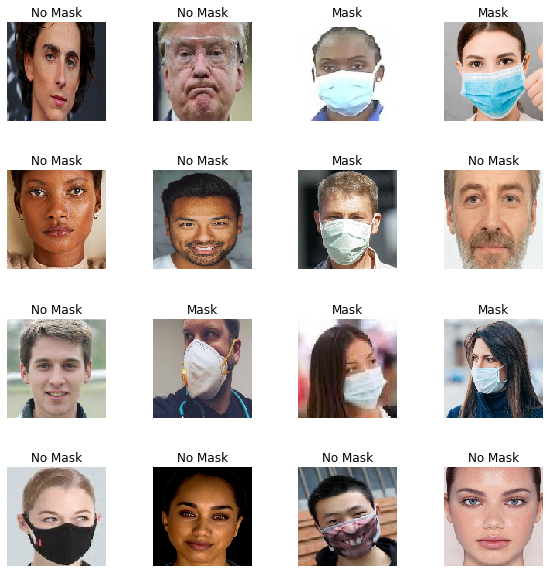

In [18]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(check_data[0][0][i])
#     color='green' if pred_id[i]==actual_id[i] else 'red'
    plt.title(labels[check_pred_id[i]])
    plt.axis('off')
plt.show()

In [19]:
test_data=image_gen.flow_from_directory('input/Mask_Datasets/Validation',target_size=(128,128),color_mode='rgb')

Found 350 images belonging to 2 classes.


In [20]:
ypred  = model.predict(test_data)
pred_id = np.argmax(ypred,axis = -1)
actual_id = np.argmax(label_batch, axis=-1)

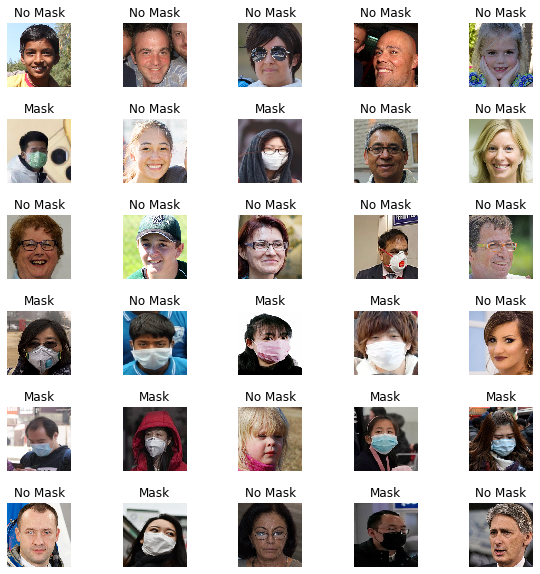

In [21]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(test_data[0][0][i])
#     color='green' if pred_id[i]==actual_id[i] else 'red'
    plt.title(labels[pred_id[i]])
    plt.axis('off')
plt.show()